## SNU PPSML 4차 정규과제 [10/19(금) 24:00 마감]

In [0]:
# Printing all outputs in a cell (not only the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

----
### ** Central Limit Theorem (중심극한정리) [160pt] **

> 각각 유한한 평균($\mu_i$)과 분산($\sigma_i^2$)을 갖는 **임의의** 모확률분포 $p_{i=1..n}(x)$가 있다고 하자.  
이때 각각 $p_i(x)$를 따르는 n개의 독립적인 확률변수 (random variable) $x_1, ..., x_n$ 뽑아서, 그 합을 $X=\sum_{i=1}^{n} x_i$이라 하면,
이러한 방식으로 조합한 확률변수 $X$의 확률분포는, $n\rightarrow \infty$ 일 때, 평균이 $\mu_{X}=\sum_{i=1}^{n} \mu_i$ 이고 분산이 $\sigma_{X}^{2}=\sum_{i=1..n}\sigma_i^2$ 인 **가우시안 확률분포(정규확률분포) $G(\mu_X,\sigma_X^2)$ **에 점근한다.

동일한 상황에서 이를 합 대신 표본평균 $\bar{X}\equiv \frac{X}{n}$에 적용하면, 표본평균 $\bar{X}$의 확률분포는 평균이 $\mu_{\bar{X}}=\frac{\sum_{i=1}^n \mu_i}{n}$ 이고 분산이 $\sigma_{\bar{X}}^{2}=\frac{\sum_{i=1..n}\sigma_i^2}{n^2}$인 정규확률분포에 점근하게 되고, 
특히 평균이 $\mu$이고 분산이 $\sigma$인, **임의의 한 종류**의 모확률분포 $p_i(x)=p(x)$로부터 독립적인 $n$개의 확률변수를 취한 표본평균 $\bar{X}$은, 역시 $n\rightarrow\infty$ 일 때, 평균이 $\mu_{\bar{X}}=\mu$이고 분산이 $\sigma_{\bar{X}}^2=\frac{\sigma^2}{n}$인 정규확률분포에 점근하게된다.  

이것이 확률론에서 가장 놀라운 결과의 하나로 여겨지는 중심극한정리(Central Limit Theorem)이다.

간단히 말하자면 서로 독립적인 확률변수의 합이 근사적으로 정규분포를 따르게 된다는 것이며, 이를 통하여 우리가 자연계에서 관찰하는 각기 다른 확률분포를 갖는 수많은 모집단으로부터 조합한 데이터들 역시 특정한 정규분포를 나타내게 된다는 매우 놀라운 현상을 설명할 수 있으며, 이는 측정의 정확도를 계산하는 데 있어 이론적인 바탕이 된다.

---

**1. 표본을 취하는 모집단의 모분포함수 $p_{i=1..n}(x)=p(x)$ 가 다음과 같은 확률을 따를때, 표본의 크기($n$)가 커짐에 따라서 표본평균($\bar{X}$)의 분포가 정규확률분포에 점근함을 직접 프로그래밍을 통하여 시연해보고, 이를 통하여 중심극한정리를 체험해보자. (Python Numpy와 matplotlib & numpy.random.randint() 
활용가능) ** [40pt]

> $p(x) =
\begin{cases}
0.5&\,\text{for}\,\, x = 0\\
0.5&\,\text{for}\,\, x = 1
\end{cases}
$

In [0]:
import numpy as np

class population_binary:
    """
    * binary 모집단 클래스
    
    * 속성 (클래스):
        1) 모집단의 평균 : mean/population mean/모평균/1차 적률/1st order moment
        2) 모집단의 분산 : var/population variance/모분산/2차 중심적률/2nd order central moment
    
    * 속성 (인스턴스):
        1) 표본 갯수 : n_s
        2) 실험 횟수 : n_exp 
        3) 표본 컨테이너 : sample (dict)    
    """

    # 모평균 & 모분산
    mean, var = 0.5, 0.25
            
    def __init__(self,n_s,n_exp,rand_seed=1):
        """
        * 인스턴스 생성자 :
            filling the 'sample' container of an instance,
            given n_s & n_exp (optionally with rand_seed).
        """

        # 표본크기(n_s)
        self.n_s = n_s

        # 표본크기(n_s)만큼의 표본채집수(n_exp)
        self.n_exp = n_exp

        # 표본저장변수(sample, main sample container, dict) 초기화
        self.sample = {'x':np.zeros((n_exp,n_s),dtype=np.float32),\
                       'x_mean':np.zeros(n_exp,dtype=np.float32),\
                       'x_var':np.zeros(n_exp,dtype=np.float)}
        # * keys
        # ======
        # 1) 'x' : 크기가 n_s인 독립확률변수집합 {x_{i=1..n_s}}을 n_exp개 만큼 저장할 
        #        (n_exp, n_s) shape의 np.array
        # 2) 'x_mean' : 'x'의 각 exp마다, 표본평균을 담을 (n_exp) shape의 np.array
        # 3) 'x_var' : 'x'의 각 exp마다, 표본분산을 담을 (n_exp) shape의 np.array 
        #   => 표본분산 (sample variance, as the unbiased estimator of sample variance ~ 1/(n_s-1))
 
        # sample 채우기
        for i in range(self.n_exp):
            x_i = np.random.randint(0,2,self.n_s)
            self.sample['x'][i] = x_i
            self.sample['x_mean'][i] = x_i.mean()
            self.sample['x_var'][i] = 1./(n_s-1)*sum(abs(x_i - self.sample['x_mean'][i])**2)


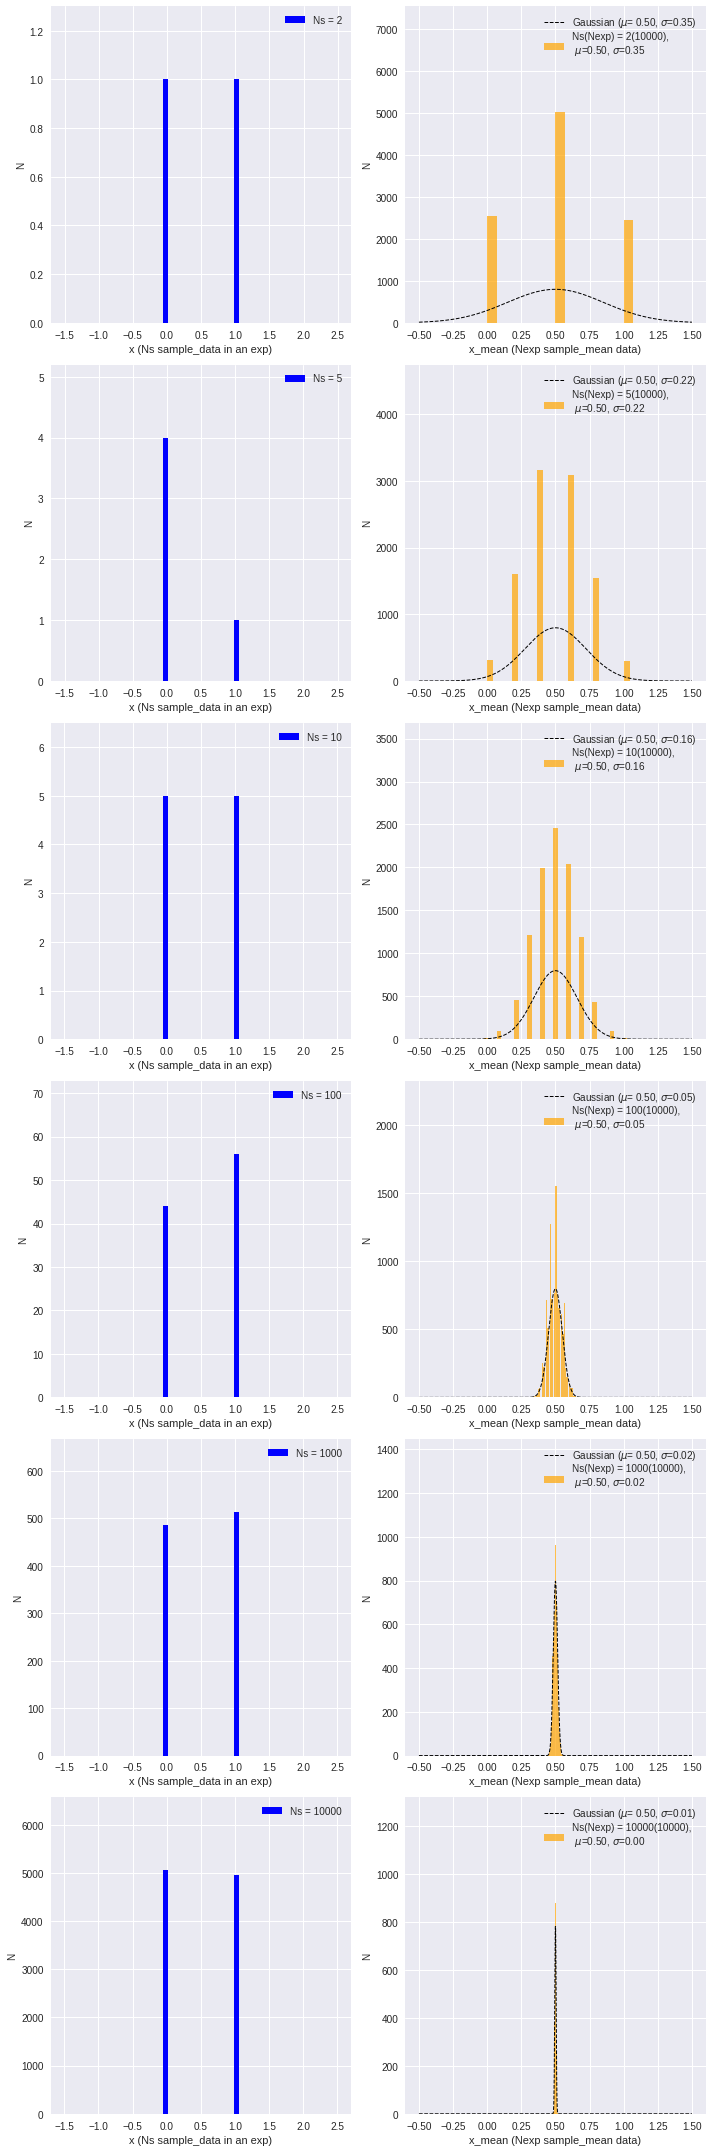

In [2]:
#
# * 표본크기(n_s)에 따른 표본 & 표본평균 & 표본분산 값들의 분포 시각화하기
# 

# ===================================================
# 1. population_binary 클래스의 인스턴스를 활용한 샘플 데이터 정의
# ===================================================

# 여러가지 표본크기(n_s)값의 리스트 (n_s[i]>=1)
n_s = np.array([2, 5, 10, 100, 1000, 10000])
n_exp = 10000

# 각기 (n_s = n_s[i] , n_exp = n_exp)의 인자로 정의된 population_binary클래스의 인스턴스로 리스트를 형성
# ex) sample_list[0] : n_s=2 & n_exp=10000인 population_binary 클래스의 인스턴스.
sample_list = [ population_binary(n_s=i,n_exp=n_exp) for i in n_s ]


# ========================================
# 2. 표본평균값 분포가 점근할 가우시안 함수 정의
# ========================================
def G(x,mean,sigma):    
    """
    * 가우시안 함수값 반환
    """
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))

# population 모평균 (표본평균의 점근값)
mean = population_binary.mean

# population 모표준편차
sigma = np.sqrt(population_binary.var)

# (n_s크기 표본의) 표본평균값 분포도가 점근할 표준편차값, np.array of shape (len(n_s))
sigma_ns = sigma/np.sqrt(n_s) 


# ========================================
# 3. Matplotlib figure & axes object 정의
# ========================================
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nx=2 # for 'x', 'x_mean'
ny=len(n_s)
unit_size=5
width=nx*unit_size
height=ny*unit_size

# (ny={n_s}, nx={x, x_mean}) shape의 figure axes 정의
fig = plt.figure(figsize=(width,height))
ax_x = [ fig.add_subplot(ny,nx,2*i+1) for i in range(len(n_s)) ]
ax_x_mean = [ fig.add_subplot(ny,nx,2*i+2) for i in range(len(n_s)) ]

# 표본샘플 (population.sample['x']) 그리기
for i, axes in enumerate(ax_x):
    
    x_min = sample_list[i].sample['x'].mean() - 2.
    x_max = sample_list[i].sample['x'].mean() + 2.
    
    n, bins, patches = axes.hist(sample_list[i].sample['x'][0], bins=50, range=(x_min, x_max), density=False,\
              facecolor='blue', label='Ns = %s'%(str(n_s[i])))
    axes.set_xlabel('x (Ns sample_data in an exp)')
    axes.set_ylabel('N', fontsize=10)
    axes.set_ybound((0,max(n)*1.3))
    
    axes.grid(True)
    axes.legend(loc='upper right')

    
# 표본평균 (population.sample['x_mean']) 그리기
for i, axes in enumerate(ax_x_mean):
    
    dx = sigma_ns[i]/5
    x_min = mean - 2*sigma
    x_max = mean + 2*sigma
    nbin = int((x_max-x_min)/dx)
        
    n, bins, patches = axes.hist(sample_list[i].sample['x_mean'], bins=nbin, range=(x_min, x_max), density=False,\
              facecolor='orange', alpha=0.7, \
              label='Ns(Nexp) = %s(%s), \n $\mu$=%4.2f, $\sigma$=%3.2f'%(str(n_s[i]),\
                                                        str(n_exp),\
                                                        sample_list[i].sample['x_mean'].mean(),\
                                                        np.sqrt(sample_list[i].sample['x_mean'].var())))
    
    # 가우시안 함수 데이터 : np.array of shape (len(n_s), 1000) 
    # for x = mean_arr values, given a sigma in sigma_ns
    mean_arr = np.linspace(x_min, x_max, 1000) 
    G_arr = [ G(mean_arr, mean, sigma=i) for i in sigma_ns ] 


    axes.plot(mean_arr, G_arr[i]*(dx*n_exp),\
              label = 'Gaussian ($\mu$= %4.2f, $\sigma$=%3.2f)'%(mean,sigma_ns[i]),\
              color='black',linestyle='dashed', linewidth=1)
    
    axes.set_xlabel('x_mean (Nexp sample_mean data)')
    axes.set_ylabel('N', fontsize=10)
    axes.set_ybound((0,max(n)*1.5))
    axes.grid(True)
    axes.legend(loc='upper right')
    

fig.tight_layout()
fig.savefig('CLT_prob1.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

---
** 2. 표본을 취하는 모집단의 모분포함수가 다음과 같은 푸아송(Poisson) 분포를 따를때, 표본의 크기($n$)가 커짐에 따라서 표본평균($\bar{X}$)의 분포가 정규확률분포에 점근함을 직접 프로그래밍을 통하여 시연해보고, 이를 통하여 중심극한정리를 또한번 체험해보자. (Python Numpy, matplotlib & numpy.random.poisson()함수 활용가능) ** [40pt]

> $p(k;\lambda) = e^{-\lambda} \frac{\lambda^k}{k!}$  
- 의미: $\lambda$ 번의 독립적인 사건 발생이 예상될 때, $k$번이 발생할 확률.  
- 푸아송 분포에서는 평균($\mu$)=분산($\sigma^2$)=$\lambda$인 관계가 성립한다.


In [0]:
import numpy as np

class population_poisson:
    """
    * Poisson분포를 따르는 모집단 클래스
    * 속성 (인스턴스):
        1) Poisson dist의 Lambda parameter (=예상발생빈도) : lamb
        2) 모집단(Poisson dist)의 평균 : mean/population mean/모평균/1차 적률/1st order moment
        3) 모집단(Poisson dist)의 분산 : var/population variance/모분산/2차 중심적률/2nd order central moment
        
        4) 표본 갯수 : n_s
        5) 실험 횟수 : n_exp 
        6) 표본 컨테이너 : sample (dict)    
    """
            
    def __init__(self,lamb,n_s,n_exp,rand_seed=1):
        """
        * 인스턴스 생성자 :
            filling the 'sample' container of an instance,
            given n_s & n_exp (optionally with rand_seed).
        """

        # Lambda parameter of Poisson distribution
        self.lamb = lamb

        # 모평균 & 모분산
        self.mean, self.var = lamb, lamb
        
        # 표본크기(n_s)
        self.n_s = n_s

        # 표본크기(n_s)만큼의 표본채집수(n_exp)
        self.n_exp = n_exp

        # 표본저장변수(sample, main sample container, dict) 초기화
        self.sample = {'x':np.zeros((n_exp,n_s),dtype=np.float32),\
                       'x_mean':np.zeros(n_exp,dtype=np.float32),\
                       'x_var':np.zeros(n_exp,dtype=np.float)}
        # * keys
        # ======
        # 1) 'x' : 크기가 n_s인 독립확률변수집합 {x_{i=1..n_s}}을 n_exp개 만큼 저장할 
        #        (n_exp, n_s) shape의 np.array
        # 2) 'x_mean' : 'x'의 각 exp마다, 표본평균을 담을 (n_exp) shape의 np.array
        # 3) 'x_var' : 'x'의 각 exp마다, 표본분산을 담을 (n_exp) shape의 np.array 
        #   => 표본분산 (sample variance, as the unbiased estimator of sample variance ~ 1/(n_s-1))
 
        # (Poisson 분포를 따르는 독립확률변수로) sample 채우기
        for i in range(self.n_exp):
            
            x_i = np.random.poisson(self.lamb,self.n_s)
            self.sample['x'][i] = x_i
            self.sample['x_mean'][i] = x_i.mean()
            self.sample['x_var'][i] = 1./(n_s-1)*sum(abs(x_i - self.sample['x_mean'][i])**2)


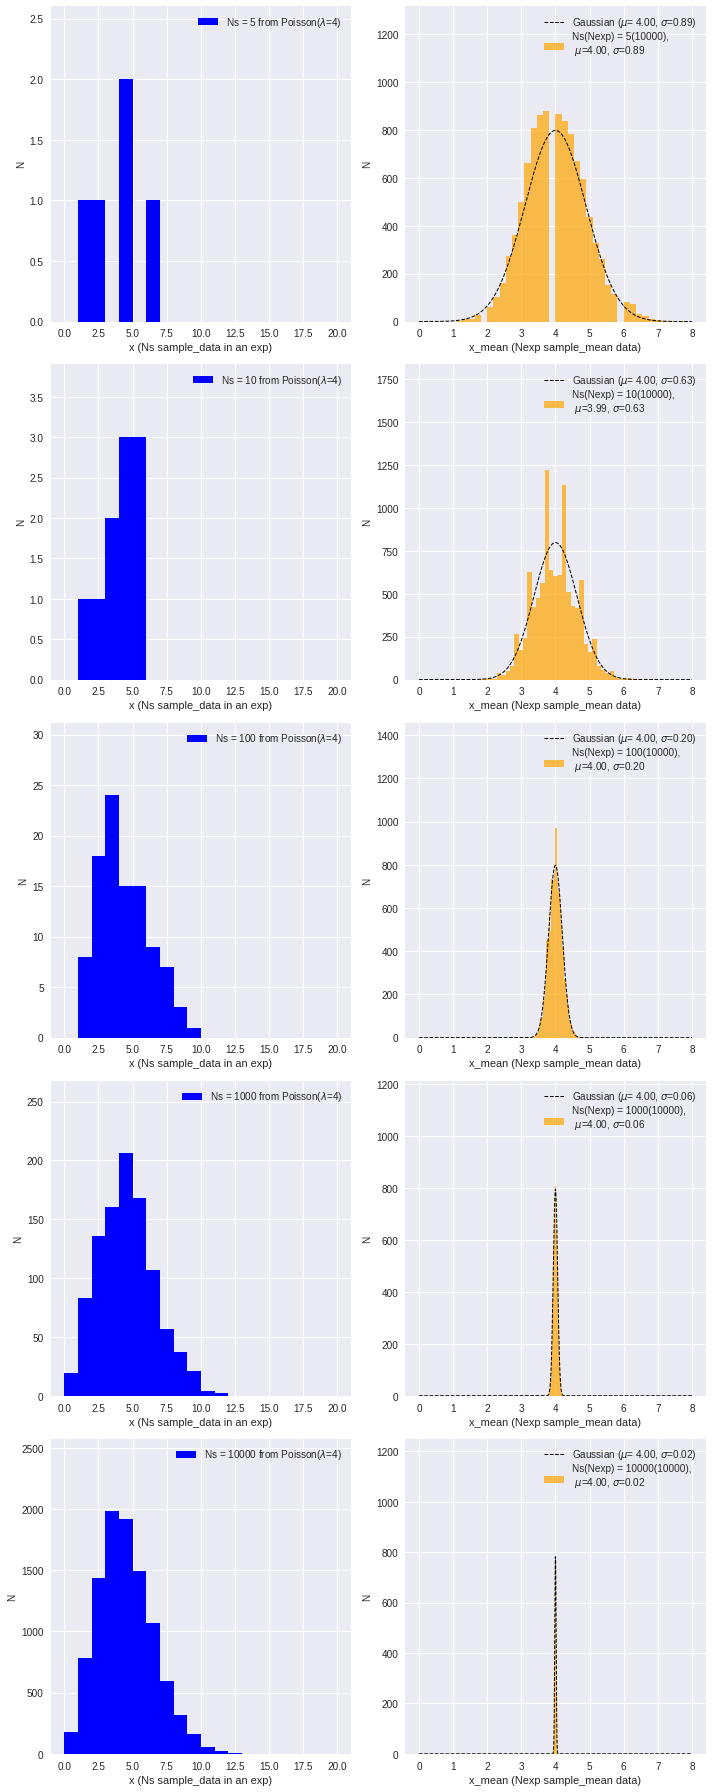

In [4]:
#
# * 표본크기(n_s)에 따른 표본 & 표본평균 & 표본분산 값들의 분포 시각화하기
# 

# ===================================================
# 1. population_poisson 클래스의 인스턴스를 활용한 샘플 데이터 정의
# ===================================================

# 여러가지 표본크기(n_s)값의 리스트 (n_s[i]>=1)
n_s = np.array([5, 10, 100, 1000, 10000])
n_exp = 10000

# lambda parameter of Poisson dist.
lamb = 4

# 각기 (n_s = n_s[i] , n_exp = n_exp)의 인자로 정의된 population_poisson 클래스의 인스턴스로 리스트를 형성
# ex) sample_list[0] : n_s=2 & n_exp=10000인 population_poisson 클래스의 인스턴스.
sample_list = [ population_poisson(lamb=lamb, n_s=i, n_exp=n_exp) for i in n_s ]


# ========================================
# 2. 표본평균값 분포가 점근할 가우시안 함수 정의
# ========================================
def G(x,mean,sigma):    
    """
    * 가우시안 함수값 반환
    """
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))

# population 모평균 (표본평균의 점근값)
mean = sample_list[0].mean

# population 모표준편차
sigma = np.sqrt(sample_list[0].var)

# (n_s크기 표본의) 표본평균값 분포도가 점근할 표준편차값, np.array of shape (len(n_s))
sigma_ns = sigma/np.sqrt(n_s) 


# ========================================
# 3. Matplotlib figure & axes object 정의
# ========================================
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nx=2 # for 'x', 'x_mean'
ny=len(n_s)
unit_size=5
width=nx*unit_size
height=ny*unit_size

# (ny={n_s}, nx={x, x_mean}) shape의 figure axes 정의
fig = plt.figure(figsize=(width,height))
ax_x = [ fig.add_subplot(ny,nx,2*i+1) for i in range(len(n_s)) ]
ax_x_mean = [ fig.add_subplot(ny,nx,2*i+2) for i in range(len(n_s)) ]

# 표본샘플 (population.sample['x']) 그리기
for i, axes in enumerate(ax_x):
    
    x_min = 0.
    x_max = 5*lamb 
    
    n, bins, patches = axes.hist(sample_list[i].sample['x'][0], bins=int(x_max), range=(x_min, x_max), density=False,\
              facecolor='blue', label='Ns = %s from Poisson($\lambda$=%s)'%(str(n_s[i]),str(lamb)))
    axes.set_xlabel('x (Ns sample_data in an exp)')
    axes.set_ylabel('N', fontsize=10)
    axes.set_ybound((0,max(n)*1.3))
    
    axes.grid(True)
    axes.legend(loc='upper right')

    
# 표본평균 (population.sample['x_mean']) 그리기
for i, axes in enumerate(ax_x_mean):
    
    dx = sigma_ns[i]/5
    x_min = mean - 2*sigma
    x_max = mean + 2*sigma
    nbin = int((x_max-x_min)/dx)
    
    # 히스토그램 
    n, bins, patches = axes.hist(sample_list[i].sample['x_mean'], bins=nbin, range=(x_min, x_max), density=False,\
              facecolor='orange', alpha=0.7, \
              label='Ns(Nexp) = %s(%s), \n $\mu$=%4.2f, $\sigma$=%3.2f'%(str(n_s[i]),\
                                                        str(n_exp),\
                                                        sample_list[i].sample['x_mean'].mean(),\
                                                        np.sqrt(sample_list[i].sample['x_mean'].var())))
    
    # 가우시안 함수 데이터 : np.array of shape (len(n_s), 1000) 
    # for x = mean_arr values, given a sigma in sigma_ns
    mean_arr = np.linspace(x_min, x_max, 1000) 
    G_arr = [ G(mean_arr, mean, sigma=i) for i in sigma_ns ] 

    # 가우시안 함수 그래프
    axes.plot(mean_arr, G_arr[i]*(dx*n_exp),\
              label = 'Gaussian ($\mu$= %4.2f, $\sigma$=%3.2f)'%(mean,sigma_ns[i]),\
              color='black',linestyle='dashed', linewidth=1)
    
    axes.set_xlabel('x_mean (Nexp sample_mean data)')
    axes.set_ylabel('N', fontsize=10)
    axes.set_ybound((0,max(n)*1.5))
    axes.grid(True)
    axes.legend(loc='upper right')
    

fig.tight_layout()
fig.savefig('CLT_prob2.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

---
** 3. 표본을 취하는 모집단의 모분포함수가 다음과 같은 (임의의 사용자정의) 함수분포를 따를때, 역시 표본의 크기($n$)가 커짐에 따라서 표본평균($\bar{X}$)의 분포가 정규확률분포에 점근하는 중심극한정리를 프로그래밍을 통하여 시연해보자 (Python Numpy, matplotlib 등등 라이브러리 활용가능) ** [80pt]

> $
p(x) = 
\begin{cases}
3x^2&\,\, \text{for}&\,\, 0<x<1\\ 
0&\,\, \text{for}&\,\, \text{others}
\end{cases}
$

---

**3-1) 임의의 사용자정의 함수분포를 따르는 확률변수(random variable)을 발생시키는 파이썬 함수를 작성하여, 위에 정의된 분포함수를 따르는 난수를 발생시켜보자. **[40pt]

In [0]:
# 확률분포함수 정의
def pdf(x):
    """
    * 확률분포함수(Probability Distribution Function)
    * 입력인자 
    1) x: pdf가 정의된 확률공간의 변수, np.array 가능 
    """
    p = 3*x**2
    x_true = (x>0.) & (x<1.)
    return p*x_true # or np.where(x_true,p,0.)
    
# 누적(확률)분포함수 정의
def cdf(x,x_np,pdf):
    """
    * 누적분포함수(Cumulative (probability) Distribution Function) 
      = integral of pdf from xmin (=-infinity) to x
    * 입력인자
    1) x: pdf가 정의된 확률공간의 변수로서, cdf의 적분상한. np.array 가능
    2) x_np: 불연속값으로 격자화된 x값들의 배열 
    3) pdf: 확률분포함수
    """
    dx = x_np[1]-x_np[0]
    integral = 0.
    for xi in x_np:
        integral += pdf(xi)*dx*(xi<x)
    return integral
    

In [0]:
# pdf 와 cdf가 정의/탐색될 확률변수값(x)의 넘파이 배열 (x_np) 정의
xmin = -0.1
xmax = 1.1
n = 1000
dx = (xmax-xmin)/n
x_np = np.linspace(xmin,xmax,n+1) 


# x_np에 대한 pdf값 배열(p_np) & cdf값 배열(c_np) 계산
p_np = pdf(x_np)
c_np = cdf(x_np,x_np,pdf)

# print(x_np)
# print(p_np)
# print(c_np)

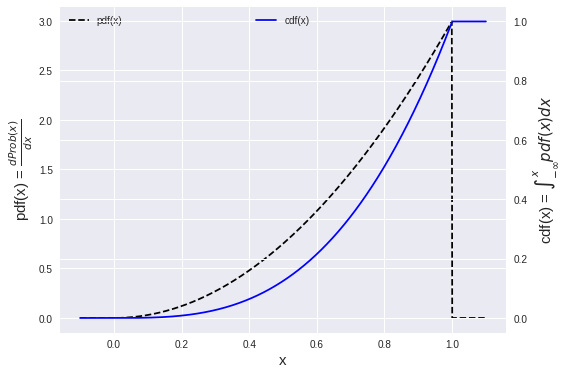

In [7]:
# pdf(x_np) & cdf(x_np) 의 시각화
import matplotlib.pyplot as plt

fig, axes_pdf = plt.subplots(figsize=(8,6))
axes_cdf = axes_pdf.twinx()

axes_pdf.plot(x_np, pdf(x_np),color='black',linestyle='dashed',label='pdf(x)')
axes_pdf.set_xlabel('x', fontsize=15)
axes_pdf.set_ylabel('pdf(x) = $\\frac{d Prob(x)}{dx}$', fontsize=15)

axes_cdf.plot(x_np, cdf(x_np,x_np,pdf),color='blue',label='cdf(x)')
axes_cdf.set_ylabel('cdf(x) = $\int_{-\infty}^{x} pdf(x) dx$', fontsize=15)

axes_pdf.legend(loc='upper left')
axes_cdf.legend(loc='upper center')
axes_cdf.grid(True)

In [0]:
# 정의된 x_np, p_np, c_np를 바탕으로 pdf(x)분포를 따르는 확률변수 생성함수의 작성

def get_rand(r,x_np,c_np):
    """
    * 확률변수 생성기 (Generator of random variables {x}, given a cdf(x)[pdf(x)]
    * 입력인자
    1) r: [0,1) 범위에서의 균일한 확률분포를 갖는 난수 하나 입력 (a random variable, uniform in [0,1))
    2) x_np: pdf 와 cdf가 정의/탐색될 확률변수값의 넘파이 배열
    3) c_np: 주어진 x_np에 대응되는 누적확률함수값(cdf(x_np))의 넘파이 배열
    """
    dx = x_np[1]-x_np[0]
    c_np_max = c_np.max()
    imax = np.where(c_np==c_np_max)[0][0] # cdf[x_i] (<1)가 포화되는 첫번째 위치 인덱스

    for i in range(len(x_np)):

        if (i < len(x_np)-1):
            """
            [0,1)범위를 갖는 균일난수 r의 입력값이 [ cdf(x_np[i]), cdf(x_np[i+1]) ) 범위에 위치할 경우,
            [x_np[i], x_np[i+1]) 범위에서의 균일분포 난수값 하나를 반환.
            """
            if (r>=c_np[i]) & (r<c_np[i+1]):
                return np.random.normal(x_np[i]+dx/2,dx/2) 

            if r>=c_np_max:
                return np.random.normal(x_np[imax]+dx/2,dx/2)
            
        if (i == len(x_np)-1):
            """
            위와 동일.
            """                        
            if (r>=c_np[i]):        
                return np.random.normal(x_np[i]+dx/2,dx/2)

            if r>=c_np_max:
                return np.random.normal(x_np[imax]+dx/2,dx/2)


In [0]:
# get_rand()를 바탕으로, pdf(x)를 따르는 확률변수들을 n_s 크기의 넘파이 배열로 생성
n_s = 10000
x_pdf_np = np.array([ get_rand(i,x_np,c_np) for i in np.random.uniform(size=n_s) ])
# x_pdf_np

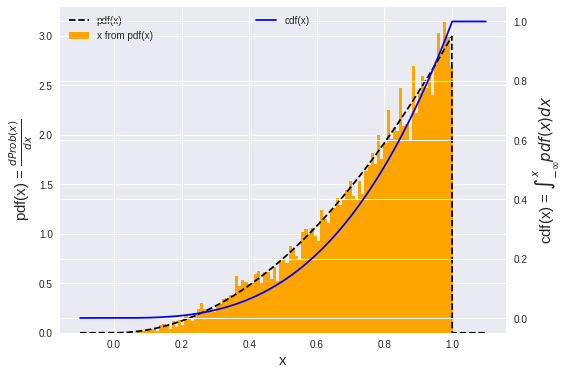

In [10]:
# pdf(x_np)와 x_pdf_np, 그리고 cdf(x_np)의 시각화
import matplotlib.pyplot as plt

fig, axes_pdf = plt.subplots(figsize=(8,6))
axes_cdf = axes_pdf.twinx()

axes_pdf.plot(x_np, pdf(x_np),color='black',linestyle='dashed',label='pdf(x)')
axes_pdf.hist(x_pdf_np,bins=100,density=True,facecolor='orange',label='x from pdf(x)')

axes_pdf.set_xlabel('x', fontsize=15)
axes_pdf.set_ylabel('pdf(x) = $\\frac{d Prob(x)}{dx}$', fontsize=15)

axes_cdf.plot(x_np, cdf(x_np,x_np,pdf),color='blue',label='cdf(x)')
axes_cdf.set_ylabel('cdf(x) = $\int_{-\infty}^{x} pdf(x) dx$', fontsize=15)

axes_pdf.legend(loc='upper left')
axes_cdf.legend(loc='upper center')
axes_cdf.grid(True)

plt.show()

---

** 3-2) 작성한 난수발생기를 활용하여 중심극한정리를 마지막으로 시연해보자.** [40pt]

In [0]:
# 사용자정의 확률분포( p_np = pdf(x_np), c_np = cdf(x_np) )가 주어졌을때, 이를 따르는 모집단 표본 클래스 정의

import numpy as np

class population_user:
    """
    * 사용자정의 확률분포( p_np = pdf(x_np), c_np = cdf(x_np) )를 따르는 모집단 표본 클래스
    
    * 속성 (인스턴스):
        모집단 확률분포공간변수값의 배열 : x_np (생성자 입력)
        모집단 확률분포함수값 배열 : p_np = pdf(x_np) (생성자 입력)
        모집단 누적확률분포값 배열 : c_np = cdf(x_np) (생성자 입력)
        표본 갯수 : n_s (생성자 입력)
        실험 횟수 : n_exp (생성자 입력)
        모집단의 평균 : mean (생성자 입력) 
        모집단의 분산 : var (생성자 입력)
        
        표본 컨테이너 : sample (dict) (생성자 계산) 
        
        난수표본생성함수 : def get_rand()
    """
            
    def __init__(self, x_np, p_np, c_np, mean, var, n_s, n_exp):
        """
        * 인스턴스 생성자 :
            filling the 'sample' container of an instance,
            given 
            n_s & n_exp,
            +
            pdf information (x_np, p_np, c_np), discretized.
        
        * 입력인자 :
            1) x_np
            2) p_np
            3) c_np
            4) n_s
            5) n_exp
        """
        self.x_np = x_np
        self.p_np = p_np
        self.c_np = c_np
        
        # 모평균 & 모분산 (of pdf(x))
        self.mean = mean
        self.var = var
        
        # 표본크기(n_s)
        self.n_s = n_s

        # 표본크기(n_s)만큼의 표본채집수(n_exp)
        self.n_exp = n_exp

        # 표본저장변수(sample, main sample container, dict) 초기화
        self.sample = {'x':np.zeros((n_exp,n_s),dtype=np.float32),\
                       'x_mean':np.zeros(n_exp,dtype=np.float32),\
                       'x_var':np.zeros(n_exp,dtype=np.float32)}
        # * keys
        # ======
        # 1) 'x' : 크기가 n_s인 독립확률변수집합 {x_{i=1..n_s}}을 n_exp개 만큼 저장할 
        #        (n_exp, n_s) shape의 np.array
        # 2) 'x_mean' : 'x'의 각 exp마다, 표본평균을 담을 (n_exp) shape의 np.array
        # 3) 'x_var' : 'x'의 각 exp마다, 표본분산을 담을 (n_exp) shape의 np.array 
        #   => 표본분산 (sample variance, as the unbiased estimator of sample variance ~ 1/(n_s-1))
 
        # (pdf 분포를 따르는 독립확률변수로) sample 채우기
        for i in range(self.n_exp):
            x_i = np.array([ self.get_rand(i,self.x_np,self.c_np) for i in np.random.uniform(size=self.n_s) ])
            self.sample['x'][i] = x_i
            self.sample['x_mean'][i] = x_i.mean()
            self.sample['x_var'][i] = 1./(n_s-1)*sum(abs(x_i - self.sample['x_mean'][i])**2)
         
            
    # x_np, pdf(x_np), cdf(x_np) 정보를 바탕으로 pdf(x)분포를 따르는 확률변수 생성함수
    def get_rand(self, r, x_np, c_np):
        """
        * 확률변수 생성기 (Generator of random variables {x}, given a cdf(x)[pdf(x)]
        * 입력인자
        1) r: [0,1) 범위에서의 균일한 확률분포를 갖는 난수 하나 입력 (a random variable, uniform in [0,1))
        2) x_np: pdf 와 cdf가 정의/탐색될 확률변수값의 넘파이 배열
        3) c_np: 주어진 x_np에 대응되는 누적확률함수값의 넘파이 배열
        """
        dx = x_np[1]-x_np[0]
        c_np_max = c_np.max()
        imax = np.where(c_np==c_np_max)[0][0] # cdf[x_i] (<1)가 포화되는 첫번째 위치 인덱스

        for i in range(len(x_np)):

            if (i < len(x_np)-1):
                """
                [0,1)범위를 갖는 균일난수 r의 입력값이 [ cdf(x_np[i]), cdf(x_np[i+1]) ) 범위에 위치할 경우,
                [x_np[i], x_np[i+1]) 범위에서의 균일분포 난수값 하나를 반환.
                """
                if (r>=c_np[i]) & (r<c_np[i+1]):
                    return np.random.normal(x_np[i]+dx/2,dx/2)

                if r>=c_np_max:
                    return np.random.normal(x_np[imax]+dx/2,dx/2)

            if (i == len(x_np)-1):
                """
                위와 동일.
                """            
                if (r>=c_np[i]):        
                    return np.random.normal(x_np[i]+dx/2,dx/2)

                if r>=c_np_max:
                    return np.random.normal(x_np[imax]+dx/2,dx/2)

In [0]:
# 확률분포함수 정의
def pdf(x):
    """
    * 확률분포함수(Probability Distribution Function)
    * 입력인자 
    1) x: pdf가 정의된 확률공간의 변수, np.array 가능 
    """
    p = 3*x**2
    x_true = (x>0.) & (x<1.)
    return p*x_true # or np.where(x_true,p,0.)
    
# 누적(확률)분포함수 정의
def cdf(x,x_np,pdf):
    """
    * 누적분포함수(Cumulative (probability) Distribution Function) 
      = integral of pdf from xmin (=-infinity) to x
    * 입력인자
    1) x: pdf가 정의된 확률공간의 변수로서, cdf의 적분상한., np.array 가능
    2) x_np: 불연속값으로 격자화된 x값들의 배열 
    3) pdf: 확률분포함수
    """
    dx = x_np[1]-x_np[0]
    integral = 0.
    for xi in x_np:
        integral += pdf(xi)*dx*(xi<x)
    return integral

# 적률계산함수 정의
def get_moment(x_np, p_np, moment_order):    
    """
    * 함수의 적률(moment)값을 반환하는 메소드
    : integration of " x**(moment_order)*pdf(x), for x in [x_np.min(), x_np.max()]
    
    * 입력인자
    1) x_np : 불연속값으로 격자화된 함수공간변수 x의 넘파이 배열
    2) p_np : 함수 pdf(x)에 대하여 pdf(x_np)로 정의된 넘파이 배열
    3) 'moment_order' = { 0:'integral', 1:'mean', 2:'variance', else: 'error'} 
    """
    dx = x_np[1]-x_np[0]
    
    if moment_order == 0:
        
        integral = 0.
        for pi in p_np:
            integral += pi*dx
        result = integral
        
    elif moment_order == 1 or moment_order == 2: 

        # 평균의 계산
        mean = 0.
        for i, xi in enumerate(x_np):
            mean += dx*xi*p_np[i]        
        result = mean

        # 분산의 계산
        if moment_order == 2:
            var = 0.
            for i, xi in enumerate(x_np):
                var += dx*((xi-mean)**2)*p_np[i]
            result = var
    else:
        return (" => check if your input of moment_order is correctly assigned. { moment_order = 0(적분) or 1(모평균) or 2(모분산) } ")

    return result



In [13]:
# pdf 와 cdf가 정의/탐색될 확률변수값의 넘파이 배열 (x_np) 정의
xmin = -0.1
xmax = 1.1
n, n2 = 1000, 100000
dx, dx2 = (xmax-xmin)/n, (xmax-xmin)/n2
x_np, x_np2 = np.linspace(xmin,xmax,n+1), np.linspace(xmin,xmax,n2+1)

# x_np에 대한 pdf값 배열(p_np) & cdf값 배열(c_np) 계산
p_np = pdf(x_np)
c_np = cdf(x_np,x_np,pdf)

# print(x_np)
# print(p_np)
# print(c_np)

# 모평균 계산
mean = get_moment(x_np2, pdf(x_np2), moment_order=1)
print(mean)

# 모분산 계산
var = get_moment(x_np2, pdf(x_np2), moment_order=2)
print(var)

0.7499939999638827
0.03749962501049478


In [0]:
# test instance of population_user class
a = population_user(x_np, p_np, c_np, mean=mean, var=var,n_s=1000, n_exp=1)

In [15]:
a.sample['x'][0]
a.sample['x_mean'][0]

0.7400395

In [16]:
#
# * 표본크기(n_s)에 따른 표본 & 표본평균 & 표본분산 값들의 분포 시각화하기
# 

# =======================================================
# 1. population_user 클래스의 인스턴스를 활용한 샘플 데이터 정의 (실행시간~1min)
# =======================================================
import time
start = time.time()

# 여러가지 표본크기(n_s)값의 리스트 (n_s[i]>=1) 
n_s = np.array([5, 10, 100, 1000])
n_exp = 100

# (x_np, p_np, c_np, mean, var, n_s = n_s[i] , n_exp = n_exp)의 인자로 정의된 
# population_user 클래스의 인스턴스로 리스트를 형성
sample_list = [ population_user(x_np,p_np,c_np,mean=mean,var=var, n_s=i, n_exp=n_exp) for i in n_s ]

print (' => Execution time : %s seconds '%(time.time()-start))


 => Execution time : 45.81809186935425 seconds 


In [0]:
# ========================================
# 2. 표본평균값 분포가 점근할 가우시안 함수 정의
# ========================================
def G(x,mean,sigma):    
    """
    * 가우시안 함수값 반환
    """
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))

# population 모평균 (표본평균의 점근값)
mean = sample_list[0].mean

# population 모표준편차
sigma = np.sqrt(sample_list[0].var)

# (n_s크기 표본의) 표본평균값 분포도가 점근할 표준편차값, np.array of shape (len(n_s))
sigma_ns = sigma/np.sqrt(n_s) 

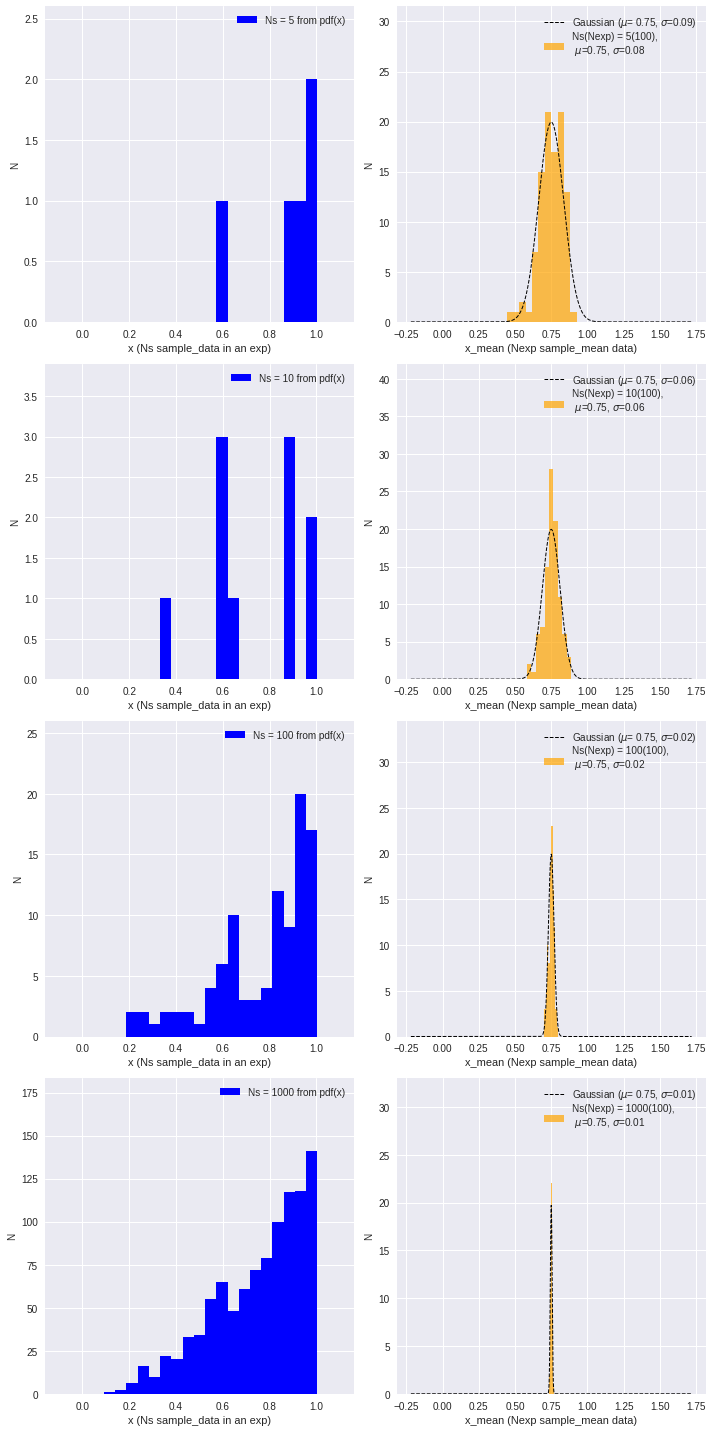

In [18]:
# ================================================
# 3. Matplotlib figure & axes object 정의 및 시각화
# ================================================
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nx=2 # for 'x', 'x_mean'
ny=len(n_s)
unit_size=5
width=nx*unit_size
height=ny*unit_size

# (ny={n_s}, nx={x, x_mean}) shape의 figure axes 정의
fig = plt.figure(figsize=(width,height))
ax_x = [ fig.add_subplot(ny,nx,2*i+1) for i in range(len(n_s)) ]
ax_x_mean = [ fig.add_subplot(ny,nx,2*i+2) for i in range(len(n_s)) ]

# 표본샘플 (sample['x']) 그리기
for i, axes in enumerate(ax_x):
    
    x_min = x_np.min()
    x_max = x_np.max()

    ni, bins, patches = axes.hist(sample_list[i].sample['x'][0], bins=25, range=(x_min, x_max), density=False,\
              facecolor='blue', label='Ns = %s from pdf(x)'%(str(n_s[i])))
    axes.set_xlabel('x (Ns sample_data in an exp)')
    axes.set_ylabel('N', fontsize=10)
    axes.set_ybound((0,max(ni)*1.3))
    
    axes.grid(True)
    axes.legend(loc='upper right')

    
# 표본평균 (sample['x_mean']) 그리기
for i, axes in enumerate(ax_x_mean):
    
    dx = sigma_ns[i]/2
    x_min = mean - 5*sigma
    x_max = mean + 5*sigma
    nbin = int((x_max-x_min)/dx)
    
    # 히스토그램 
    ni, bins, patches = axes.hist(sample_list[i].sample['x_mean'], bins=nbin, range=(x_min, x_max), density=False,\
              facecolor='orange', alpha=0.7, \
              label='Ns(Nexp) = %s(%s), \n $\mu$=%4.2f, $\sigma$=%3.2f'%(str(n_s[i]),\
                                                        str(n_exp),\
                                                        sample_list[i].sample['x_mean'].mean(),\
                                                        np.sqrt(sample_list[i].sample['x_mean'].var())))
    
    # 가우시안 함수 데이터 : np.array of shape (len(n_s), 1000) 
    # for x = mean_arr values, given a sigma in sigma_ns
    mean_arr = np.linspace(x_min, x_max, 1000) 
    G_arr = [ G(mean_arr, mean, sigma=i) for i in sigma_ns ] 

    # 가우시안 함수 그래프
    axes.plot(mean_arr, G_arr[i]*(dx*n_exp),\
              label = 'Gaussian ($\mu$= %4.2f, $\sigma$=%3.2f)'%(mean,sigma_ns[i]),\
              color='black',linestyle='dashed', linewidth=1)
    
    axes.set_xlabel('x_mean (Nexp sample_mean data)')
    axes.set_ylabel('N', fontsize=10)
    axes.set_ybound((0,max(ni)*1.5))
    axes.grid(True)
    axes.legend(loc='upper right')
    

fig.tight_layout()
fig.savefig('CLT_prob3.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()